## PART 2
# Neural network Homework 1  \   Q3_1_partB - Adaline
# Adaline - Training for the <u>second Class </u> of Wine dataset Vs All


In [81]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

X_i = X.to_numpy()
Y_i = y.to_numpy()
Y_i_copy =Y_i.copy()
X_i_copy =X_i.copy()

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [84]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [85]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [86]:
X_1 = pd.DataFrame(wine.data.features, columns=['Alcohol', 'Malicacid'])
X_1

,Alcohol,Malicacid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


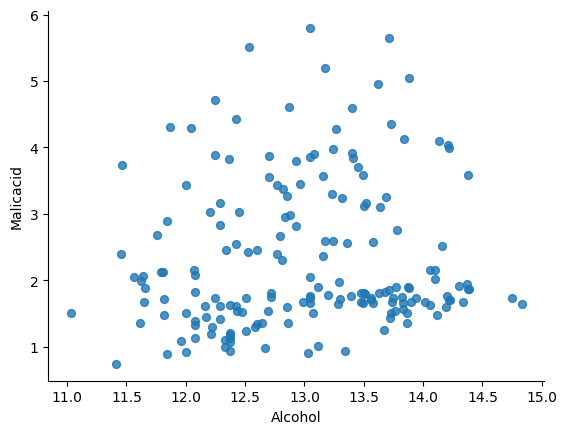

In [87]:
# @title Alcohol vs Malicacid

from matplotlib import pyplot as plt
X_1.plot(kind='scatter', x='Alcohol', y='Malicacid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
X.isnull().any()


Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool

In [89]:
y.isnull().any()

class    False
dtype: bool

In [90]:
X_2 = X_1.to_numpy()
Y_1 = y.to_numpy()
Y_1_copy =Y_1.copy()
X_2_copy =X_2.copy()

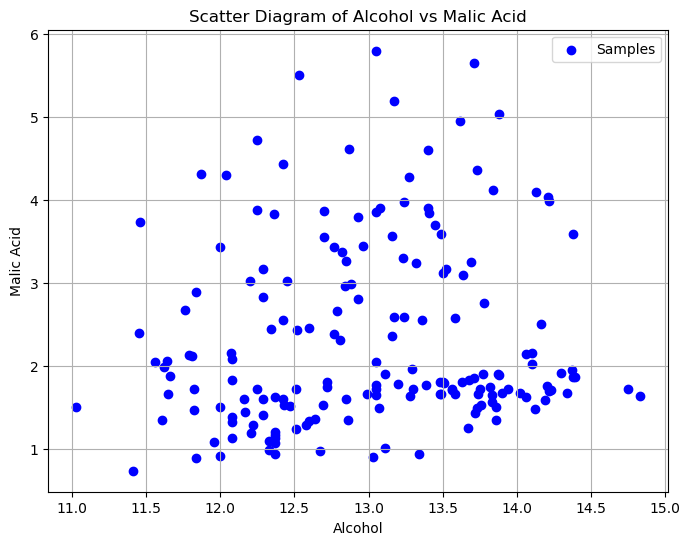

In [91]:
import matplotlib.pyplot as plt

# Plotting the scatter diagram
plt.figure(figsize=(8, 6))
plt.scatter(X_1['Alcohol'], X_1['Malicacid'], c='blue', marker='o', label='Samples')
plt.title('Scatter Diagram of Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


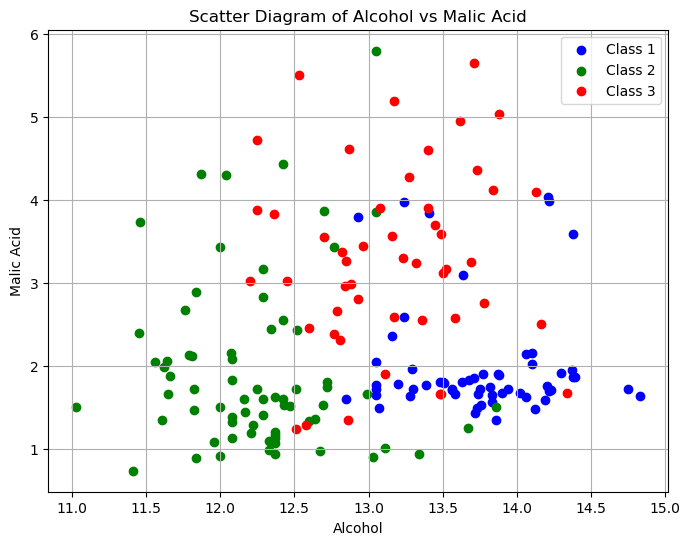

In [92]:

colors = ['blue', 'green', 'red']

# Plotting the scatter diagram for each class
plt.figure(figsize=(8, 6))

for i, class_name in enumerate([1, 2, 3]):
    indices = np.where(Y_1 == class_name)
    X_plot = X_2[indices[0]]
   # print(X_plot.shape)
    # Scatter plot for each class using .iloc for proper indexing
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=colors[i], marker='o', label=f'Class {class_name}')

plt.title('Scatter Diagram of Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The target variable is 'Class' which has values 1, 2, or 3
'''
df = pd.read_csv('wine_data.csv')
X = df[['Alcohol', 'Malic Acid']].values  another way for reading the data
y = df['Class'].values
'''

# Convert class labels to binary (class 2 vs. non-class 2 as example)
Y_ii = np.where(Y_i == 2, 1, -1)  # Class 1 vs others 2

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_i, Y_ii, test_size=0.15, random_state=0)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(Y_ii.shape, X_i.shape, X_train_std.shape, y_train.shape)

(178, 1) (178, 13) (151, 13) (151, 1)


### Plotting Class 2 VS others

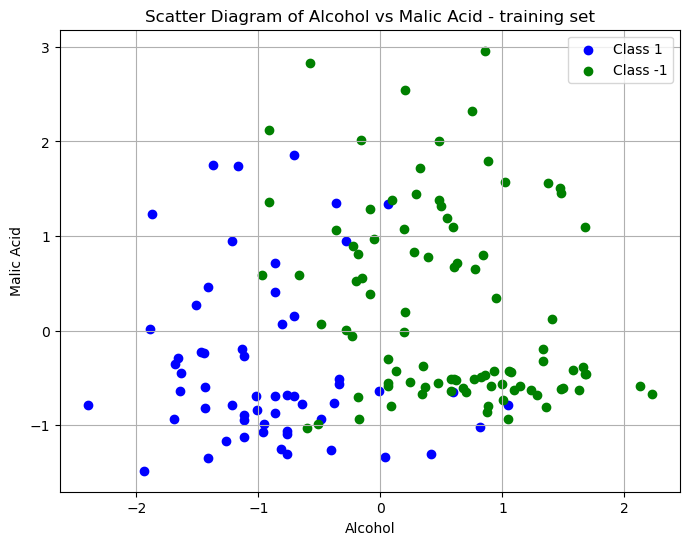

In [94]:
colors = ['blue', 'green']

# Plotting the scatter diagram for each class
plt.figure(figsize=(8, 6))

for i, class_name in enumerate([1, -1]):
    indices = np.where(y_train == class_name)
    X_plot = X_train_std[indices[0]]
   # print(X_plot.shape)
    # Scatter plot for each class using .iloc for proper indexing
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=colors[i], marker='o', label=f'Class {class_name}')

plt.title('Scatter Diagram of Alcohol vs Malic Acid - training set')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

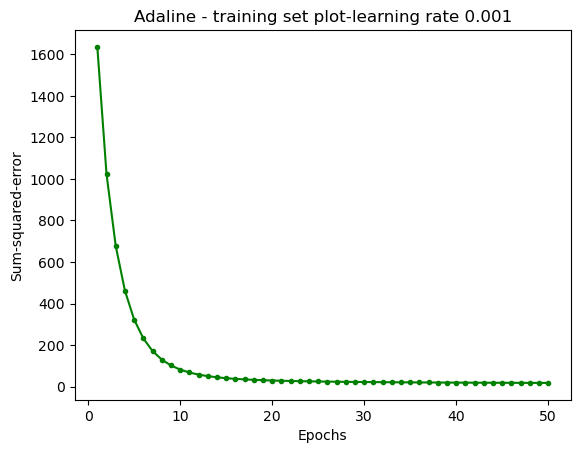

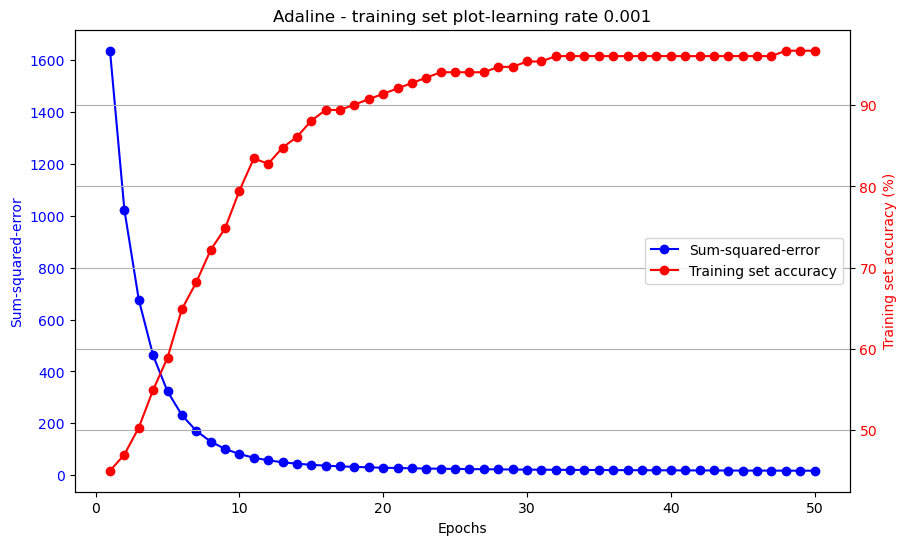

In [95]:

import numpy as np
import matplotlib.pyplot as plt

class Adaline:
    def __init__(self, learning_rate=0.001, epochs=20, random_state=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y, X_test=None, Y_test=None):
        rgen = np.random.RandomState(self.random_state)  # Creating random number generator
        self.weights = rgen.randn(1 + X.shape[1], 1)
        self.cost_ = []
        self.eval_cost_ = []
        self.accuracy = []
        self.eval_accuracy = []
        for _ in range(self.epochs):
            output = self.f(X)
            errors = y - output
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
            self.accuracy.append(self.prediction_AND_accuracy(X, y)[1])

            if X_test is not None and Y_test is not None:
              # for evaluating on test set
              eval_output = self.f(X_test)
              eval_errors = Y_test - eval_output
              eval_cost = (eval_errors ** 2).sum() / 2.0
              self.eval_cost_.append(eval_cost)
              self.eval_accuracy.append(self.prediction_AND_accuracy(X_test, Y_test)[1])

        return self

    def f(self, X):
        k=np.dot(X, self.weights[1:]) + self.weights[0]
        return k
    
    def prediction_AND_accuracy(self, actual_X, actual_Y):
        predicted = np.where(self.f(actual_X) >= 0.0, 1, -1)
        correct_predictions = np.sum(predicted == actual_Y)
        accuracy = (correct_predictions / actual_X.shape[0]) * 100
        return predicted, accuracy

    def predict(self, X):
        return np.where(self.f(X) >= 0.0, 1, -1)
    


'''  # dummy data set for training
# Creating a synthetic dataset
np.random.seed(1)  # For reproducibility
X = np.random.randn(160, 2)  # 100 samples with 2 features
y = np.array([1 if x[0] - x[1] > 0 else -1 for x in X])  # Binary targets
y=np.reshape(y,(X.shape[0],1))
print(X.shape, y.shape)
'''

#print(Y_2.shape, X_2.shape,X_test_std.shape, y_train.shape)

# Instantiating the Adaline class
adaline = Adaline(learning_rate=0.001, epochs=50, random_state=0)
# Fitting the Adaline model
adaline.fit(X_train_std, y_train, X_test_std,  y_test)
weights=adaline.weights



'''
#Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline.accuracy) + 1), adaline.accuracy, marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('training_set accuracy')
plt.title('Adaline - Learning rate 0.001')
plt.show()

''' 

#different method for ploting cost and accuracy in a distinct method
# Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='.', color='green')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - training set plot-learning rate 0.001')
plt.show()

plt.figure(figsize=(10, 6))  # Adjusts the size of the plot

# Plotting the sum-squared-error
sse_line, = plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o', color='blue', label='Sum-squared-error')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for accuracy
ax2 = plt.gca().twinx()  # Get current axis and create another y-axis sharing the same x-axis
acc_line, = ax2.plot(range(1, len(adaline.accuracy) + 1), adaline.accuracy, marker='o', color='red', label='Training set accuracy')
ax2.set_ylabel('Training set accuracy (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.legend(handles=[sse_line, acc_line], loc='center right')

plt.title('Adaline - training set plot-learning rate 0.001')

# Adding grid for better readability
plt.grid(True)
plt.show()




In [96]:
print('Trainset accuracy of adaline = ' ,adaline.accuracy[-1] )

Trainset accuracy of adaline =  96.68874172185431


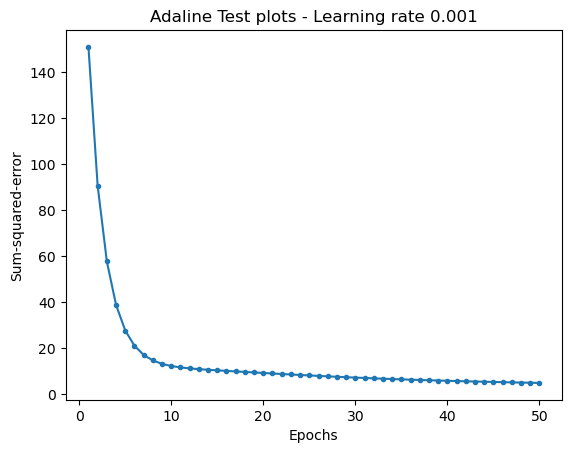

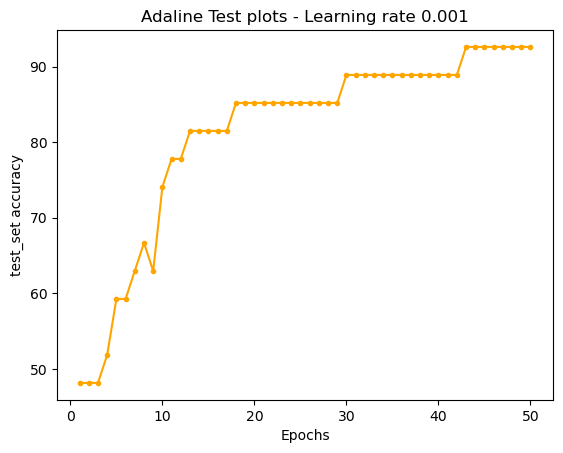

In [97]:

# testset accuracy plot

# Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline.eval_cost_) + 1), adaline.eval_cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline Test plots - Learning rate 0.001')
plt.show()

# Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline.eval_accuracy) + 1), adaline.eval_accuracy, marker='.', color='orange')
plt.xlabel('Epochs')
plt.ylabel('test_set accuracy')
plt.title('Adaline Test plots - Learning rate 0.001')
plt.show()

In [98]:
print('Testset accuracy of adaline = ' ,adaline.eval_accuracy[-1] )

Testset accuracy of adaline =  92.5925925925926


(151, 2)
(151, 1)


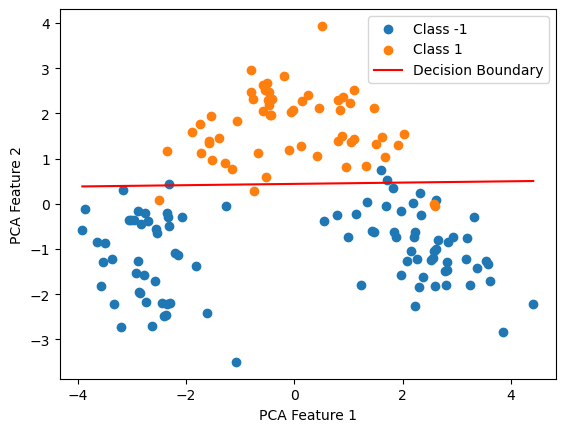

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming adaline.weights, X_train, and y_train are defined properly
weights = adaline.weights[1:]  # Exclude the bias term for PCA
bias = adaline.weights[0]

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_train_std)
print(X_r.shape)
print(y_train.shape)
# Plot the reduced data points with labels
for label in np.unique(y_train.flatten()):
    plt.scatter(X_r[y_train.flatten() == label, 0], X_r[y_train.flatten() == label, 1], label=f'Class {label}')

# Calculate the decision boundary in reduced space
w_reduced = pca.transform(weights.reshape(1, -1))
b_reduced = bias
x_values = np.linspace(X_r[:, 0].min(), X_r[:, 0].max(), 300)
y_values = -(w_reduced[0, 0] * x_values + b_reduced) / w_reduced[0, 1]

plt.plot(x_values, y_values, label='Decision Boundary', color='red')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


In [100]:
def result(X_train_std,y_train, adaline):
    predicted_values = adaline.predict(X_train_std)
    correcet_predicted=sum(predicted_values==y_train)
    numbers_of_training_set = predicted_values.shape[0]

    print('--------------------------Adaline summery result--------------------------')
    print('Elapsed epochs : ', adaline.epochs)
    print('we used %i features for learning  '% X_train_std.shape[1] )
    print('numbers of correctly predicted in trainset= ',correcet_predicted[0] )
    print('length of selected training dataset = ',numbers_of_training_set )
    print('Trainset accuracy of madaline with %i features is = '%X_train_std.shape[1] ,adaline.accuracy[-1] )
    print('Testset accuracy of madaline with %i features is = '%X_train_std.shape[1] ,adaline.eval_accuracy[-1] )

result(X_train_std,y_train, adaline)

--------------------------Adaline summery result--------------------------
Elapsed epochs :  50
we used 13 features for learning  
numbers of correctly predicted in trainset=  146
length of selected training dataset =  151
Trainset accuracy of madaline with 13 features is =  96.68874172185431
Testset accuracy of madaline with 13 features is =  92.5925925925926


## here we implement the same code for only training 2 feature 'Malic Acid' and 'Alcohol' 

### we also provide this results in our code

In [101]:
Y_2 = np.where(Y_1 == 2, 1, -1)  # Class 1 vs others 2
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.15, random_state=0)
# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(Y_2.shape, X_2.shape,X_test_std.shape, y_train.shape)

(178, 1) (178, 2) (27, 2) (151, 1)


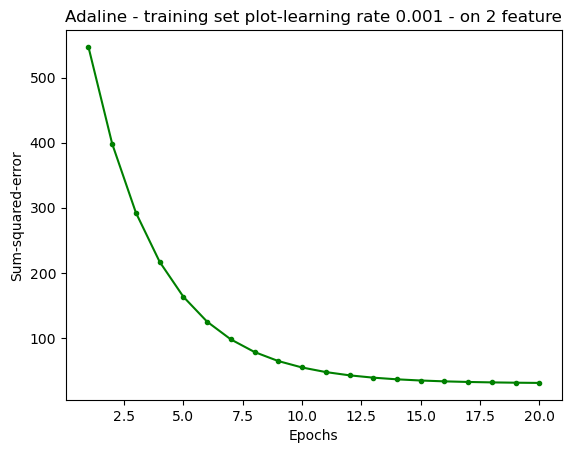

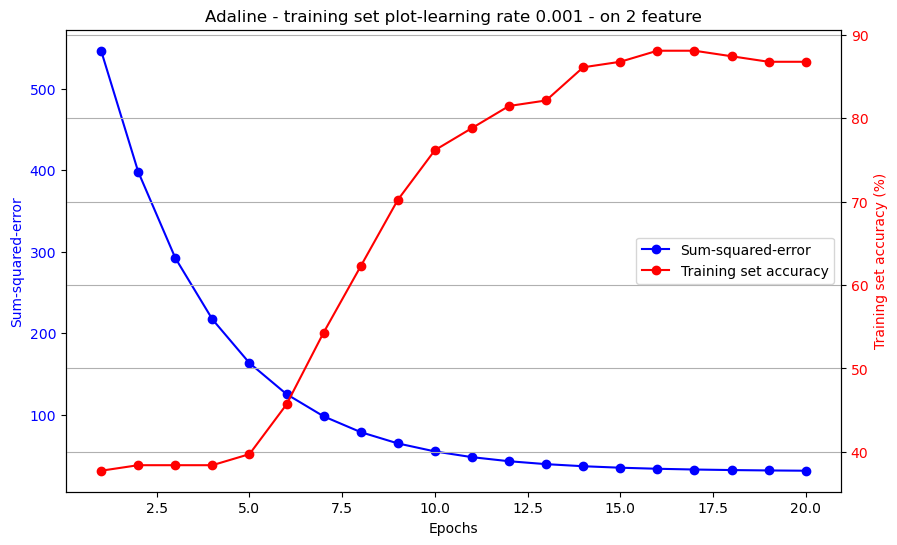

In [102]:
adaline1 = Adaline(learning_rate=0.001, epochs=20, random_state=0) #we train or netowrk for two feature
# Fitting the Adaline model
adaline1.fit(X_train_std, y_train, X_test_std,  y_test)
weights=adaline1.weights



'''
#Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline.accuracy) + 1), adaline.accuracy, marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('training_set accuracy')
plt.title('Adaline - Learning rate 0.001')
plt.show()

''' 

#different method for ploting cost and accuracy in a distinct method
# Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline1.cost_) + 1), adaline1.cost_, marker='.', color='green')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - training set plot-learning rate 0.001 - on 2 feature')
plt.show()

plt.figure(figsize=(10, 6))  # Adjusts the size of the plot

# Plotting the sum-squared-error
sse_line, = plt.plot(range(1, len(adaline1.cost_) + 1), adaline1.cost_, marker='o', color='blue', label='Sum-squared-error')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for accuracy
ax2 = plt.gca().twinx()  # Get current axis and create another y-axis sharing the same x-axis
acc_line, = ax2.plot(range(1, len(adaline1.accuracy) + 1), adaline1.accuracy, marker='o', color='red', label='Training set accuracy')
ax2.set_ylabel('Training set accuracy (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.legend(handles=[sse_line, acc_line], loc='center right')

plt.title('Adaline - training set plot-learning rate 0.001 - on 2 feature')

# Adding grid for better readability
plt.grid(True)
plt.show()


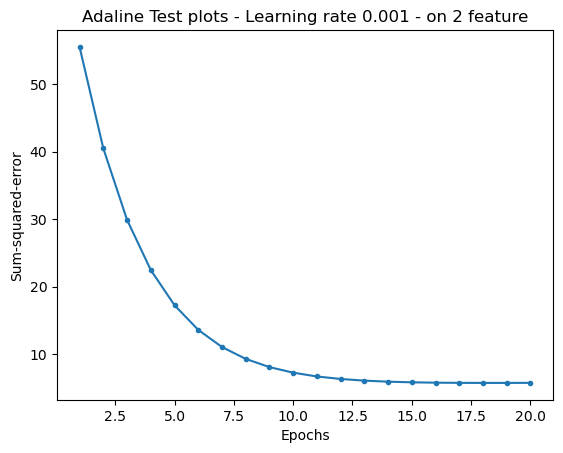

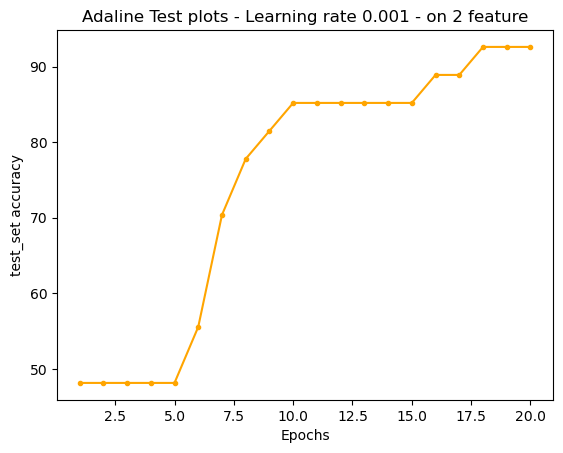

In [103]:
# testset accuracy plot

# Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline1.eval_cost_) + 1), adaline1.eval_cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline Test plots - Learning rate 0.001 - on 2 feature')
plt.show()

# Plotting the cost against the number of epochs
plt.plot(range(1, len(adaline1.eval_accuracy) + 1), adaline1.eval_accuracy, marker='.', color='orange')
plt.xlabel('Epochs')
plt.ylabel('test_set accuracy')
plt.title('Adaline Test plots - Learning rate 0.001 - on 2 feature')
plt.show()

In [104]:
print('Testset accuracy of adaline = ' ,adaline1.eval_accuracy[-1] )

Testset accuracy of adaline =  92.5925925925926


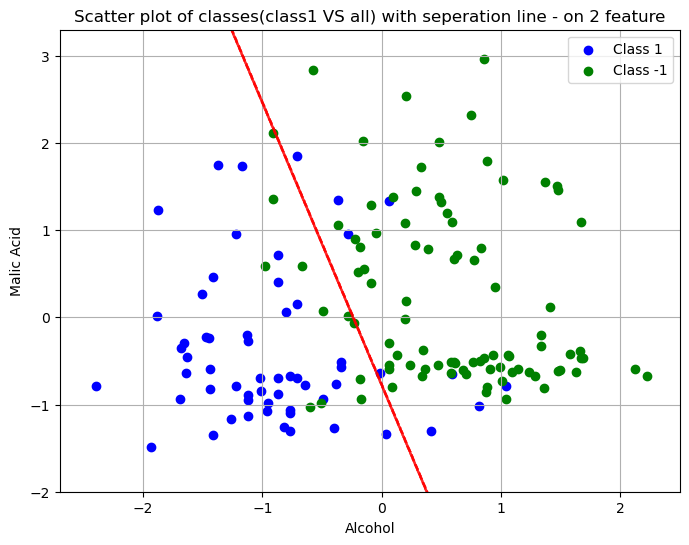

In [105]:
y_train1 = np.array(y_train).copy().flatten()  # This ensures y_train is one-dimensional
colors = ['blue', 'green']

plt.figure(figsize=(8, 6))
class_labels = [1, -1]
for i,target_name in enumerate(class_labels):
    # Select rows where the class label matches target_name
    X_filtered = X_train_std[y_train1 == target_name]
    # Plot these rows, using the first and second columns for x and y coordinates, respectively
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=colors[i], marker='o', label=f'Class {target_name}')


    h = .005  # step size in the mesh
    x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
    y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
    k=np.arange(x_min, x_max, h)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    x_forplot = np.c_[xx.ravel(), yy.ravel()]
    predicted_values = adaline1.predict(x_forplot)

    Z = predicted_values.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='red', alpha=0.2)


plt.title('Scatter plot of classes(class1 VS all) with seperation line - on 2 feature')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.ylim(-2,3.3)
plt.xlim(-2.7,2.5)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [106]:
result(X_train_std,y_train, adaline1)

--------------------------Adaline summery result--------------------------
Elapsed epochs :  20
we used 2 features for learning  
numbers of correctly predicted in trainset=  131
length of selected training dataset =  151
Trainset accuracy of madaline with 2 features is =  86.75496688741721
Testset accuracy of madaline with 2 features is =  92.5925925925926
